In this notebook, we implement the Conjugate Gradient Method,Newton method and Steepest Descent Method.

The animations are too large so I saved them as gifs for easy viewing.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from matplotlib import animation
matplotlib.rcParams['animation.embed_limit'] = 2**128

%matplotlib inline

In [2]:
delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.01


def CreateMeshData(f):
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[f(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)


In [3]:
def f(x,y):
    """

    """
    return np.sin(y) * x  + np.sin(x) * y  +  x * x +  y *y

def Jacob(state):
    """
    jacobi matrix of  function
    """
    x=state[0]
    y=state[1]
    dx=2*x + np.sin(y)+y*np.cos(x)
    dy=2*y + x*np.cos(y) + np.sin(x)
    J=np.array([dx,dy])
    return J

def Hessian(state):
    u"""
    Hessian matrix of function
    """
    x=state[0]
    y=state[1]
    dxx=2-y*np.sin(x)
    dxy=np.cos(x)+np.cos(y)
    dyy=2-x*np.sin(y)
    H=np.array([[dxx,dxy],[dxy,dyy]])
    return H

 ### Conjugate Gradient Method

In [4]:
def ConjugateGradientMethod(start,Jacob):
    u"""
    Conjugate Gradient Method Optimization
    """

    result=start
    x=start
    preJ=None

    while 1:
        J=Jacob(x)

        #convergence check
        sumJ=sum([abs(alpha*j) for j in J])
        if sumJ<=0.001:
            print("OK")
            break

        if preJ is not None:
            beta=np.linalg.norm(J)**2/np.linalg.norm(preJ)**2
            grad=-1.0*J+beta*grad

        else:
            grad=-1.0*J
            
        x=x+[alpha*g for g in grad]
        result=np.vstack((result,x))
        #  print(x)

        if math.isnan(x[0]):
            print("nan")
            break
        

        preJ=-1.0*J


    return result


### Newton Method

In [5]:

def NewtonMethod(start,Jacob,Hessian):
    u"""
    Newton Method Optimization
    """

    result=start
    x=start

    while 1:
        J=Jacob(x)
        H=Hessian(x)
        sumJ=sum([abs(alpha*j) for j in J])
        if sumJ<=0.001:
            print("OK")
            break

        grad=-np.linalg.inv(H).dot(J) 
       # print(grad)

        x=x+[alpha*j for j in grad]
        
        result=np.vstack((result,x))

    return result

In [6]:
def get_value(f,Jacob,Hessian):
    start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])
    result_CG= ConjugateGradientMethod(start,Jacob)
    result_NM = NewtonMethod(start,Jacob,Hessian)
    
    optX_CG=[x[0] for x in result_CG]
    optY_CG=[x[1] for x in result_CG]
    
    optX_NM=[x[0] for x in result_NM]
    optY_NM=[x[1] for x in result_NM]
    
    optX = [optX_CG,optX_NM]
    optY = [optY_CG,optY_NM]
    return start,optX,optY

def plot(start,f,optX,optY):
       
    (X,Y,Z)=CreateMeshData(f)
    CS = plt.contour(X, Y, Z,nContour)

    plt.plot(start[0],start[1],"xr");
 
    plt.plot(optX[0],optY[0],label = 'ConjugateGradient')
    plt.plot(optX[1],optY[1],label = 'Newton')
    plt.legend(loc='upper left')
    plt.show()
    


OK
OK


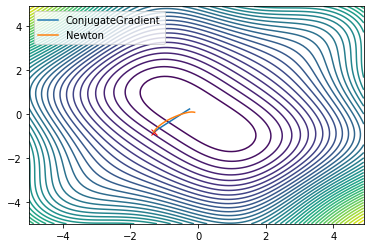

In [7]:
start,optX,optY = get_value(f,Jacob,Hessian)
plot(start,f,optX,optY)

46 407


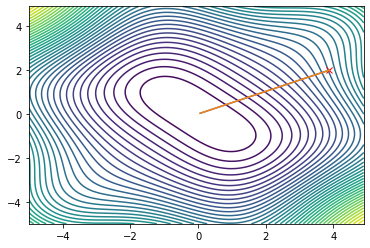

In [13]:
from IPython.display import HTML

fig = plt.figure()
(X,Y,Z)=CreateMeshData(f)
CS = plt.contour(X, Y, Z,nContour)
plt.plot(start[0],start[1],"xr")  
print(len(optX[0]),len(optX[1]))
lines = [plt.plot([], [])[0] for _ in range(2)] #lines to animate
def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(optX[j][:i], optY[j][:i])
    return lines


anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(optX[1]), interval=60, blit=True)
    
#HTML(anim.to_jshtml())
anim.save('./gifs/f1.gif', dpi=80, writer='imagemagick')


In [ ]:
def f2(x,y):


    return 0.26*(x*x+y*y)+0.48*x*y

def Jacob2(state):
    u"""
    jacobi matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dx=x
    dy=y
    J=np.array([dx,dy])
    return J

def Hessian2(state):
    u"""
    Hessian matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dxx=1
    dxy=0
    dyy=1
    H=np.array([[dxx,dxy],[dxy,dyy]])
    return H

In [ ]:
start,optX,optY = get_value(f2,Jacob2,Hessian2)
plot(start,f2,optX,optY)

46 407


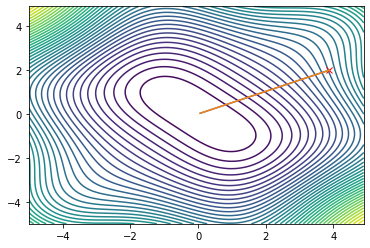

In [11]:
fig = plt.figure()
(X,Y,Z)=CreateMeshData(f)
CS = plt.contour(X, Y, Z,nContour)
plt.plot(start[0],start[1],"xr")  
print(len(optX[0]),len(optX[1]))
lines = [plt.plot([], [])[0] for _ in range(2)] #lines to animate
def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(optX[j][:i], optY[j][:i])
    return lines


anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(optX[1]), interval=60, blit=True)
    

anim.save('./gifs/f2.gif', dpi=80, writer='imagemagick')
#HTML(anim.to_jshtml())

In [29]:
def f3(x, y):
    u"""

    """
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def Hessian3(state):
    u"""
    Hessian matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dxx=12*x**2+4*y-42;
    dxy=4*x+4*y
    dyy=4*x+12*y**2-26
    H=np.array([[dxx,dxy],[dxy,dyy]])
    return H
    

def Jacob3(state):
    u"""
    jacobi matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dx=4*x**3+4*x*y-44*x+2*x+2*y**2-14
    dy=2*x**2+4*x*y+4*y**3-26*y-22
    J=np.array([dx,dy])
    return J

OK
OK


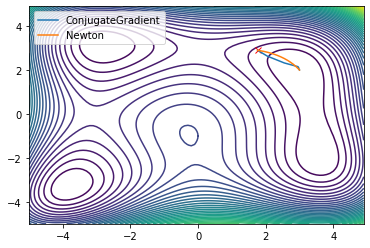

In [37]:
start,optX,optY = get_value(f3,Jacob3,Hessian3)
plot(start,f3,optX,optY)

In [ ]:
fig = plt.figure()
(X,Y,Z)=CreateMeshData(f)
CS = plt.contour(X, Y, Z,nContour)
plt.plot(start[0],start[1],"xr")  
print(len(optX[0]),len(optX[1]))
lines = [plt.plot([], [])[0] for _ in range(2)] #lines to animate
def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(optX[j][:i], optY[j][:i])
    return lines


anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(optX[1]), interval=60, blit=True)
    

anim.save('./gifs/f3.gif', dpi=80, writer='imagemagick')
#HTML(anim.to_jshtml())

10 630


### Steepest Descent Method

OK
OK
OK


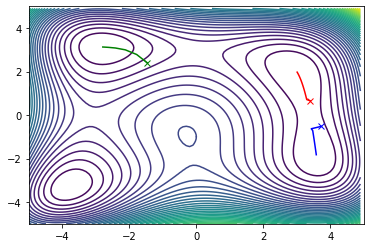

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import random

delta = 0.1
minXY = -5.0
maxXY = 5.0
nContour = 50
alpha = 0.01


def Jacob(state):
    u"""
    jacobi matrix of Himmelblau's function
    """
    x = state[0, 0]
    y = state[0, 1]
    dx = 4 * x ** 3 + 4 * x * y - 44 * x + 2 * x + 2 * y ** 2 - 14
    dy = 2 * x ** 2 + 4 * x * y + 4 * y ** 3 - 26 * y - 22
    J = np.matrix([dx, dy])
    return J


def f(x, y):
    u"""

    """
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2


def ConstrainFunction(x):
    return (2.0 * x + 1.0)


def CreateMeshData(f):
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z = [f(ix, iy) for (ix, iy) in zip(X, Y)]
    return(X, Y, Z)


def SteepestDescentMethod(start, Jacob):
    u"""
    Steepest Descent Method Optimization
    """

    result = start
    x = start

    while 1:
        J = Jacob(x)
        #print(J)
        sumJ = np.sum(abs(alpha * J))
        if sumJ <= 0.01:
            print("OK")
            break

        x = x - alpha * J
        result = np.vstack((result, x))

    return result


# Main
start = np.matrix([random.uniform(minXY, maxXY), random.uniform(minXY, maxXY)])
start2 = np.matrix([random.uniform(minXY, maxXY), random.uniform(minXY, maxXY)])
start3 = np.matrix([random.uniform(minXY, maxXY), random.uniform(minXY, maxXY)])

result = SteepestDescentMethod(start, Jacob)
result2 = SteepestDescentMethod(start2, Jacob)
result3 = SteepestDescentMethod(start3, Jacob)

(X, Y, Z) = CreateMeshData(f)
CS = plt.contour(X, Y, Z, nContour)

Xc = np.arange(minXY, maxXY, delta)
Yc = [ConstrainFunction(x) for x in Xc]

plt.plot(start[0, 0], start[0, 1], "xr")
plt.plot(start2[0, 0], start2[0, 1], "xg")
plt.plot(start3[0, 0], start3[0, 1], "xb")

plt.plot(result[:, 0], result[:, 1], "-r")
plt.plot(result2[:, 0], result2[:, 1], "-g")
plt.plot(result3[:, 0], result3[:, 1], "-b")

plt.axis([minXY, maxXY, minXY, maxXY])
plt.show()

In [59]:
result_X = [result[:, 0],result2[:, 0],result3[:, 0]]
result_Y = [result[:, 1],result2[:, 1],result3[:, 1]]

22 8 20


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


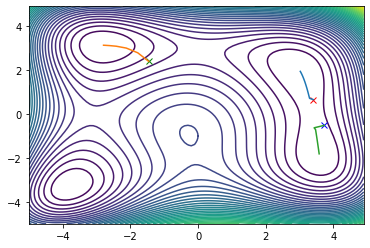

In [60]:
fig = plt.figure()
(X, Y, Z) = CreateMeshData(f)
CS = plt.contour(X, Y, Z, nContour)

Xc = np.arange(minXY, maxXY, delta)
Yc = [ConstrainFunction(x) for x in Xc]

plt.plot(start[0, 0], start[0, 1], "xr")
plt.plot(start2[0, 0], start2[0, 1], "xg")
plt.plot(start3[0, 0], start3[0, 1], "xb") 
print(len(result_X[0]),len(result_X[1]),len(result_X[2]))

lines = [plt.plot([], [])[0] for _ in range(3)] #lines to animate
def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(result_X[j][:i], result_Y[j][:i])
    return lines


anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(result_X[0]), interval=60, blit=True)
    
#HTML(anim.to_jshtml())
anim.save('./gifs/f4.gif', dpi=80, writer='imagemagick')